# Capstone Regression Project

## Business Understanding

#### - For the real estate constructors, investors, and agents
#### - Do houses sold in any specific season cost more?
#### - Which features have the strongest relationship with house price?
#### - How much do these features affect the house price?

## Data Understanding

This dataset contains house sale prices in King County, Washington. It includes homes sold between June 2021 and June 2022. The Main  column's name represents as follows.

* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
* `greenbelt` - Whether the house is adjacent to a green belt
* `nuisance` - Whether the house has traffic noise or other recorded nuisances
* `view` - Quality of view from house
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
* `grade` - Overall grade of the house. Related to the construction and design of the house.
* `heat_source` - Heat source for the house
* `sewer_system` - Sewer system for the house
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `sqft_garage` - Square footage of garage space
* `sqft_patio` - Square footage of outdoor porch or deck space
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated

-- Most fields were pulled from the [King County Assessor Data Download](https://info.kingcounty.gov/assessor/DataDownload/default.aspx).


<br>

## Data Preparation

### Loading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


### Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [4]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
count,3.015500e+04,30155,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155,30155,...,30141,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155,30155.000000,30155.000000
unique,NaN,365,NaN,NaN,NaN,NaN,NaN,NaN,2,2,...,4,NaN,NaN,NaN,NaN,NaN,NaN,29560,NaN,NaN
top,NaN,7/1/2021,NaN,NaN,NaN,NaN,NaN,NaN,NO,NO,...,PUBLIC,NaN,NaN,NaN,NaN,NaN,NaN,"Avenue, 108 Foothill Blvd, Rancho Cucamonga, C...",NaN,NaN
freq,NaN,196,NaN,NaN,NaN,NaN,NaN,NaN,29636,29382,...,25777,NaN,NaN,NaN,NaN,NaN,NaN,38,NaN,NaN
mean,4.538104e+09,NaN,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,NaN,NaN,...,NaN,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,NaN,47.328076,-121.317397
std,2.882587e+09,NaN,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,NaN,NaN,...,NaN,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,NaN,1.434005,5.725475
min,1.000055e+06,NaN,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,NaN,NaN,...,NaN,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,NaN,21.274240,-157.791480
25%,2.064175e+09,NaN,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,NaN,NaN,...,NaN,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,NaN,47.405320,-122.326045
50%,3.874011e+09,NaN,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,NaN,NaN,...,NaN,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,NaN,47.551380,-122.225585
75%,7.287100e+09,NaN,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,NaN,NaN,...,NaN,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,NaN,47.669913,-122.116205


In [5]:
df.shape

(30155, 25)

### Data Cleaning

-- drop the 'id' column - numerical column with no importance to modeling

In [6]:
df = df.drop(columns='id', axis=1)

-- Check and drop the null value

In [7]:
df.isna().sum() / df.shape[0]

date             0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.000000
greenbelt        0.000000
nuisance         0.000000
view             0.000000
condition        0.000000
grade            0.000000
heat_source      0.001061
sewer_system     0.000464
sqft_above       0.000000
sqft_basement    0.000000
sqft_garage      0.000000
sqft_patio       0.000000
yr_built         0.000000
yr_renovated     0.000000
address          0.000000
lat              0.000000
long             0.000000
dtype: float64

In [8]:
df = df.dropna(subset=['heat_source', 'sewer_system'], axis=0)
df.shape

(30111, 24)

-- Rename and Change the dtype of 'date' columm 

In [9]:
df = df.rename(columns = {'date':'selldate'})

In [10]:
df.selldate = pd.to_datetime(df.selldate)
df.selldate.sort_values()

10487   2021-06-10
10506   2021-06-10
1226    2021-06-10
2873    2021-06-10
11064   2021-06-10
           ...    
17062   2022-06-08
11484   2022-06-08
14479   2022-06-08
490     2022-06-08
5555    2022-06-09
Name: selldate, Length: 30111, dtype: datetime64[ns]

### Feature engineering

#### 1. Calculate 'How old' of each house 

In [11]:
df['yr_old'] = np.where(df.yr_renovated != 0, df.selldate.apply(lambda x: x.year) - df.yr_renovated, 
                       df.selldate.apply(lambda x: x.year) - df.yr_built)
df.head()

,selldate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,yr_old
0,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,53
1,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,71
2,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,65
3,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,11
4,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,9


#### 2. Calculate the bathrooms per bedroom

#### Drop the '0' bathroom and '0' bedroom data   
- Because '0" denominator makes the 'infinite' value   
- with 'inf', it's impossible to produce the necessary values.

In [12]:
# Check the Bathrooms column

df.bathrooms.describe()

count    30111.000000
mean         2.335708
std          0.888293
min          0.000000
25%          2.000000
50%          2.500000
75%          3.000000
max         10.500000
Name: bathrooms, dtype: float64

In [13]:
df.bathrooms.isin([0]).value_counts()

False    30086
True        25
Name: bathrooms, dtype: int64

In [14]:
# Drop the '0' values

bath_index = df[df['bathrooms'] <= 0].index

In [15]:
df = df.drop(bath_index)

In [16]:
df.bathrooms.describe()

count    30086.000000
mean         2.337649
std          0.886106
min          0.500000
25%          2.000000
50%          2.500000
75%          3.000000
max         10.500000
Name: bathrooms, dtype: float64

In [17]:
# Check the Bedrooms column

df.bedrooms.describe()

count    30086.000000
mean         3.417703
std          0.975855
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         13.000000
Name: bedrooms, dtype: float64

In [18]:
df.bedrooms.isin([0]).value_counts()

False    30068
True        18
Name: bedrooms, dtype: int64

In [19]:
# Drop the '0' values

bed_index = df[df['bedrooms'] <= 0].index
df = df.drop(bed_index)

In [20]:
df.bedrooms.describe()

count    30068.000000
mean         3.419749
std          0.972556
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         13.000000
Name: bedrooms, dtype: float64

In [21]:
# Calculate the bath_per_bed

df['bath_per_bed'] = df['bathrooms'] / df['bedrooms']

#### 3.Calculate the Square footage of living space per bedroom

In [22]:
# Calculate the sqft_per_bed

df['sqft_per_bed'] = df['sqft_living'] / df['bedrooms']

#### 4. Categorize the sell season by the sell month

In [23]:
df['sell_month'] = df['selldate'].dt.month

In [24]:
df.sell_month.value_counts()

7     3266
8     3245
9     2921
10    2817
6     2755
4     2616
3     2577
11    2559
5     2520
12    1959
2     1641
1     1192
Name: sell_month, dtype: int64

In [25]:
def trans(s_m):
    if 3 <= s_m < 6 : return 'Spring'
    elif 6 <= s_m < 9 : return 'Summer'
    elif 9 <= s_m < 12 : return 'Fall'
    else : return 'Winter'

df['sell_season'] = df['sell_month'].apply(trans)
df.head()

,selldate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,yr_built,yr_renovated,address,lat,long,yr_old,bath_per_bed,sqft_per_bed,sell_month,sell_season
0,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,53,0.250000,295.0,5,Spring
1,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,71,0.500000,554.0,12,Winter
2,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,65,0.333333,480.0,9,Fall
3,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,11,1.000000,720.0,12,Winter
4,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,9,1.000000,560.0,8,Summer


In [26]:
df.sell_season.value_counts()

Summer    9266
Fall      8297
Spring    7713
Winter    4792
Name: sell_season, dtype: int64

In [27]:
# Make unit $1,000

df.groupby('sell_season').mean()['price'] / 1000

sell_season
Fall      1047.405239
Spring    1237.941153
Summer    1071.581542
Winter    1079.185883
Name: price, dtype: float64

In [28]:
# Check Overall Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30068 entries, 0 to 30154
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   selldate       30068 non-null  datetime64[ns]
 1   price          30068 non-null  float64       
 2   bedrooms       30068 non-null  int64         
 3   bathrooms      30068 non-null  float64       
 4   sqft_living    30068 non-null  int64         
 5   sqft_lot       30068 non-null  int64         
 6   floors         30068 non-null  float64       
 7   waterfront     30068 non-null  object        
 8   greenbelt      30068 non-null  object        
 9   nuisance       30068 non-null  object        
 10  view           30068 non-null  object        
 11  condition      30068 non-null  object        
 12  grade          30068 non-null  object        
 13  heat_source    30068 non-null  object        
 14  sewer_system   30068 non-null  object        
 15  sqft_above     3006

In [29]:
# Check the all features correlation

df.corr() 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,yr_old,bath_per_bed,sqft_per_bed,sell_month
price,1.000000,0.293069,0.483861,0.611943,0.085531,0.182295,0.541515,0.245996,0.265129,0.315092,0.096739,0.085664,0.063660,-0.022338,-0.128102,0.256798,0.508154,-0.053337
bedrooms,0.293069,1.000000,0.585517,0.638824,0.008991,0.151103,0.548235,0.237257,0.316666,0.181840,0.147731,0.015613,0.109778,-0.107850,-0.158962,-0.226861,0.015599,0.020990
bathrooms,0.483861,0.585517,1.000000,0.774198,0.039121,0.409431,0.676402,0.260176,0.456079,0.327314,0.446440,0.041418,-0.005599,0.017758,-0.474920,0.603190,0.505824,0.024807
sqft_living,0.611943,0.638824,0.774198,1.000000,0.124647,0.304686,0.883613,0.337392,0.511070,0.396511,0.292212,0.039433,0.102461,-0.087904,-0.313365,0.274721,0.738629,0.017102
sqft_lot,0.085531,0.008991,0.039121,0.124647,1.000000,-0.030631,0.134073,0.005158,0.090932,0.156467,0.002619,0.009693,0.030272,-0.034514,-0.004275,0.036953,0.161732,0.009784
floors,0.182295,0.151103,0.409431,0.304686,-0.030631,1.000000,0.448564,-0.248654,0.133788,0.126010,0.544194,-0.024640,-0.218513,0.233914,-0.552913,0.373737,0.266792,0.000104
sqft_above,0.541515,0.548235,0.676402,0.883613,0.134073,0.448564,1.000000,-0.068585,0.560351,0.312583,0.387774,0.011399,0.092496,-0.082934,-0.398146,0.239524,0.657384,0.009810
sqft_basement,0.245996,0.237257,0.260176,0.337392,0.005158,-0.248654,-0.068585,1.000000,0.025005,0.209961,-0.230621,0.054109,0.059670,-0.045142,0.210875,0.082390,0.248586,0.013016
sqft_garage,0.265129,0.316666,0.456079,0.511070,0.090932,0.133788,0.560351,0.025005,1.000000,0.215876,0.448531,-0.098343,0.092175,-0.096767,-0.409847,0.205139,0.381503,0.001360
sqft_patio,0.315092,0.181840,0.327314,0.396511,0.156467,0.126010,0.312583,0.209961,0.215876,1.000000,0.138513,0.056296,-0.019722,0.025694,-0.157859,0.204833,0.352731,0.013859


## Modeling

### Baseline Model

In [30]:
# Create a filter that has only the numerical columns of the dataset

pred_cols = [ x for x in df.select_dtypes('number').columns if x not in ['selldate', 'price', 'sell_month']]
pred_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'yr_old',
 'bath_per_bed',
 'sqft_per_bed']

In [31]:
# Apply the filter to the dataset, assign the model features to 'preds' and assign price to 'target'.

preds = df[pred_cols]
target = df.price

In [32]:
# create baseline model predictor df and target

y = target
X = preds

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     1390.
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        14:16:28   Log-Likelihood:            -4.4636e+05
No. Observations:               30068   AIC:                         8.928e+05
Df Residuals:                   30051   BIC:                         8.929e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.137e+06   1.56e+06     -3.299

The R2 value which gives the accuracy of the model is at 0.425. So, let's check the correlation between target and predictors to filter and select more fitting variables for building the more improved the model.

#### Identifying a Highly Correlated Predictor
   
-- Check correlation

In [33]:
df.select_dtypes('number').corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,yr_old,bath_per_bed,sqft_per_bed,sell_month
price,1.000000,0.293069,0.483861,0.611943,0.085531,0.182295,0.541515,0.245996,0.265129,0.315092,0.096739,0.085664,0.063660,-0.022338,-0.128102,0.256798,0.508154,-0.053337
bedrooms,0.293069,1.000000,0.585517,0.638824,0.008991,0.151103,0.548235,0.237257,0.316666,0.181840,0.147731,0.015613,0.109778,-0.107850,-0.158962,-0.226861,0.015599,0.020990
bathrooms,0.483861,0.585517,1.000000,0.774198,0.039121,0.409431,0.676402,0.260176,0.456079,0.327314,0.446440,0.041418,-0.005599,0.017758,-0.474920,0.603190,0.505824,0.024807
sqft_living,0.611943,0.638824,0.774198,1.000000,0.124647,0.304686,0.883613,0.337392,0.511070,0.396511,0.292212,0.039433,0.102461,-0.087904,-0.313365,0.274721,0.738629,0.017102
sqft_lot,0.085531,0.008991,0.039121,0.124647,1.000000,-0.030631,0.134073,0.005158,0.090932,0.156467,0.002619,0.009693,0.030272,-0.034514,-0.004275,0.036953,0.161732,0.009784
floors,0.182295,0.151103,0.409431,0.304686,-0.030631,1.000000,0.448564,-0.248654,0.133788,0.126010,0.544194,-0.024640,-0.218513,0.233914,-0.552913,0.373737,0.266792,0.000104
sqft_above,0.541515,0.548235,0.676402,0.883613,0.134073,0.448564,1.000000,-0.068585,0.560351,0.312583,0.387774,0.011399,0.092496,-0.082934,-0.398146,0.239524,0.657384,0.009810
sqft_basement,0.245996,0.237257,0.260176,0.337392,0.005158,-0.248654,-0.068585,1.000000,0.025005,0.209961,-0.230621,0.054109,0.059670,-0.045142,0.210875,0.082390,0.248586,0.013016
sqft_garage,0.265129,0.316666,0.456079,0.511070,0.090932,0.133788,0.560351,0.025005,1.000000,0.215876,0.448531,-0.098343,0.092175,-0.096767,-0.409847,0.205139,0.381503,0.001360
sqft_patio,0.315092,0.181840,0.327314,0.396511,0.156467,0.126010,0.312583,0.209961,0.215876,1.000000,0.138513,0.056296,-0.019722,0.025694,-0.157859,0.204833,0.352731,0.013859


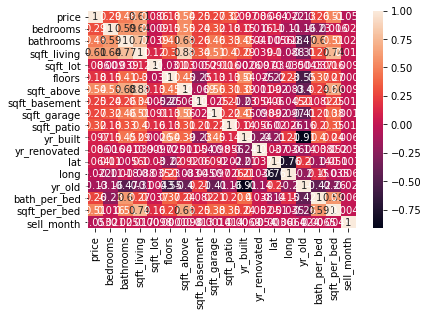

In [34]:
sns.heatmap(df.select_dtypes('number').corr(), annot=True)
sns.set(rc = {'figure.figsize':(25,15)})

-- The target variable is 'Price'.   
-- Check the correlation coefficients for all of the variables to find the highest correlation with 'price'

In [35]:
df.select_dtypes('number').corr()['price']

price            1.000000
bedrooms         0.293069
bathrooms        0.483861
sqft_living      0.611943
sqft_lot         0.085531
floors           0.182295
sqft_above       0.541515
sqft_basement    0.245996
sqft_garage      0.265129
sqft_patio       0.315092
yr_built         0.096739
yr_renovated     0.085664
lat              0.063660
long            -0.022338
yr_old          -0.128102
bath_per_bed     0.256798
sqft_per_bed     0.508154
sell_month      -0.053337
Name: price, dtype: float64

-- Base on the above data, there are several relatively high correlation varibles with Price   
-- sqft_living (0.61)   
-- bathrooms (0.48)   
-- sqft_above (0.54)  
-- Sqft_per_bed (0.51)

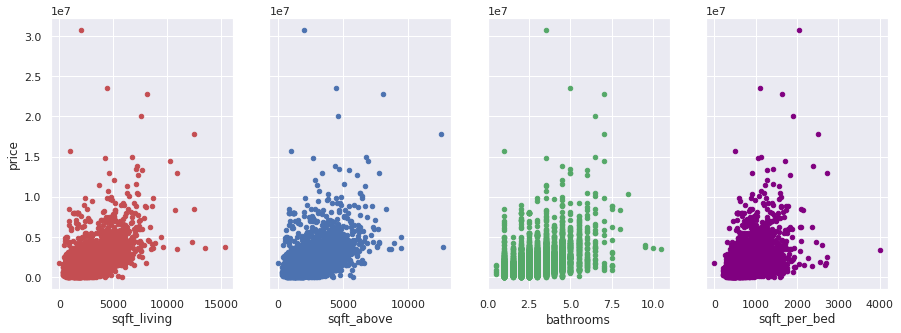

In [36]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(15,5))

df.plot.scatter(x='sqft_living', y='price', color='r', sharey=True, ax=ax1)
df.plot.scatter(x='sqft_above', y='price', color='b', ax=ax2)
df.plot.scatter(x='bathrooms', y='price', color='g', ax=ax3)
df.plot.scatter(x='sqft_per_bed', y='price', color='purple', ax=ax4);

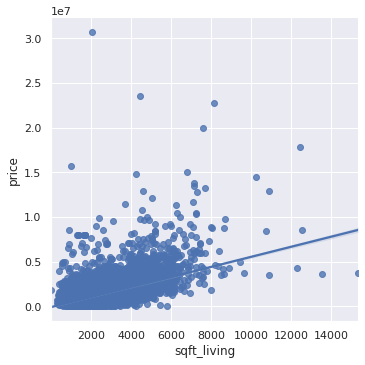

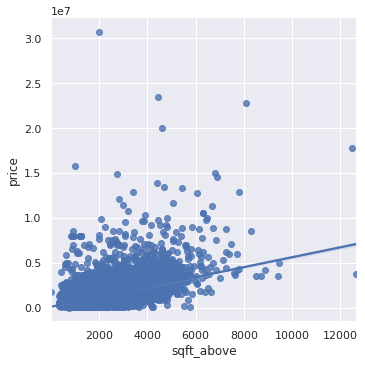

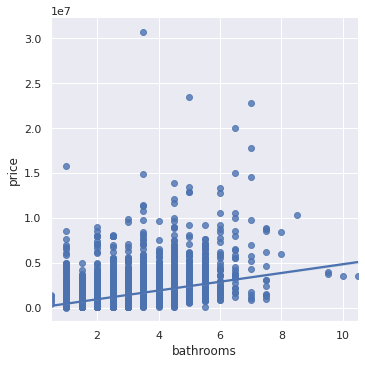

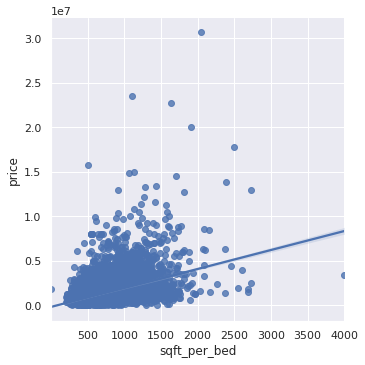

In [99]:
sns.lmplot(data = df, x='sqft_living', y='price')
sns.lmplot(data = df, x='sqft_above', y='price')
sns.lmplot(data = df, x='bathrooms', y='price')
sns.lmplot(data = df, x='sqft_per_bed', y='price');

#### -- Build a baseline model again based on the above correlation

In [37]:
y = df.price
X = df[['sqft_living', 'sqft_above', 'bathrooms', 'sqft_per_bed']]

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     4651.
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        14:16:30   Log-Likelihood:            -4.4745e+05
No. Observations:               30068   AIC:                         8.949e+05
Df Residuals:                   30063   BIC:                         8.950e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.712e+05   1.45e+04    -18.673   

-- Decreasing the predictors reduces the R2 value, but the difference is not big(0.043)   
-- The t-statistic  p_value of 'sqft_above' is high enough to reject   
-- So remove it in the baseline model

#### Baseline Model

In [38]:
X = df[['sqft_living', 'bathrooms', 'sqft_per_bed']]

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     6201.
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        14:16:31   Log-Likelihood:            -4.4745e+05
No. Observations:               30068   AIC:                         8.949e+05
Df Residuals:                   30064   BIC:                         8.949e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.709e+05   1.45e+04    -18.726   

- Plotting the residuals for checking whether the model is performing well or not

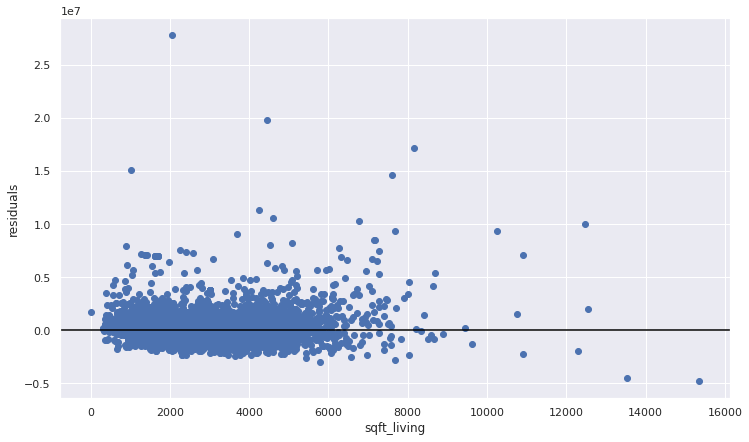

In [92]:
fig, ax = plt.subplots(figsize=(12,7))

ax.scatter(df['sqft_living'], results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals");

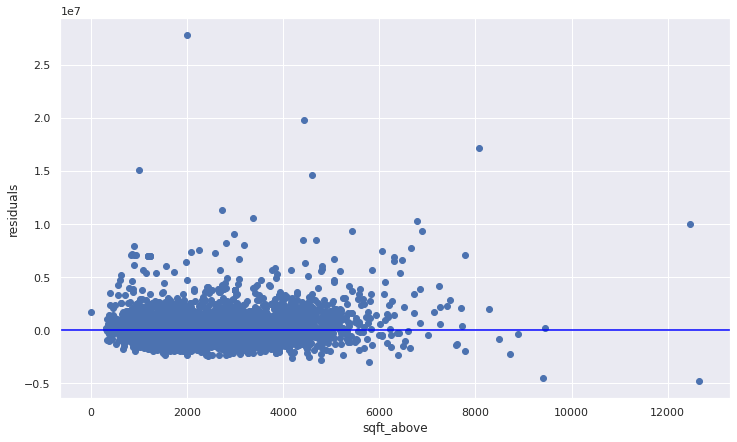

In [100]:
fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(df['sqft_above'], results.resid)
ax.axhline(y=0, color="blue")
ax.set_xlabel("sqft_above")
ax.set_ylabel("residuals");

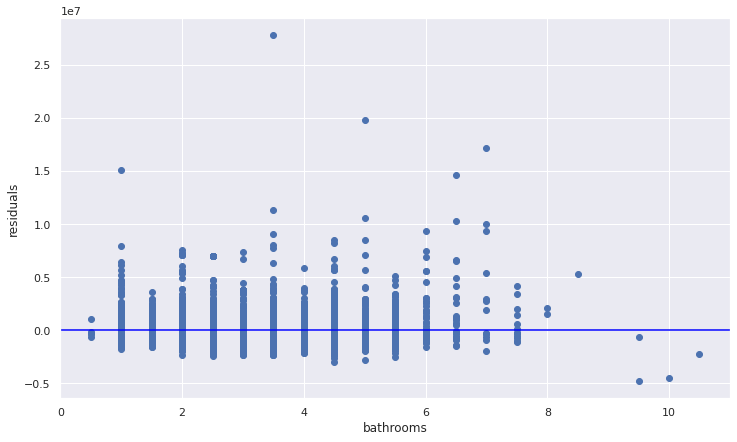

In [101]:
fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(df['bathrooms'], results.resid)
ax.axhline(y=0, color="blue")
ax.set_xlabel("bathrooms")
ax.set_ylabel("residuals");

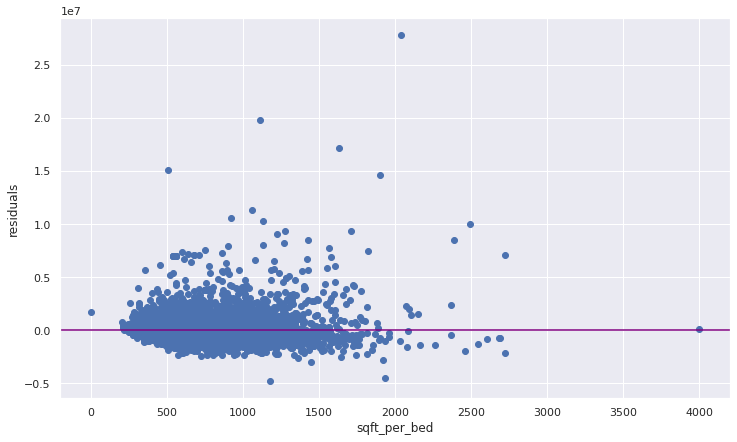

In [93]:
fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(df['sqft_per_bed'], results.resid)
ax.axhline(y=0, color="purple")
ax.set_xlabel("sqft_per_bed")
ax.set_ylabel("residuals");


- Looks good even though each feature has some outliers

#### Baseline Model Interpretation

- The baseline model is statistically significant overall, with an F-statistic p-value well below 0.05   
- The baseline model explains about 38% of the variance in Sale Price   
- The baseline model coefficients (const, sqft_living, bathrooms and sqft_per_bed) are all statistically significant, with t-statistic p-values well below 0.05
- For each increase of sqft_living, we see an associated increase in Sale Price of about ```$ 441```   
- For each increase of bathrooms, we see an associated increase in Sale Price of about ```$ 47K```   
- For each increase of sqft_per_bed, we see an associated increase in Sale Price of about ```$ 547```

### Model Iteration

-- To improve upon the baseline model, dummify the categorical variables

-- Select the 'object' column and drop 'address' column

In [39]:
object_df = df.select_dtypes('object').drop(columns='address', axis=1)
cat_columns = object_df.columns
cat_columns

Index(['waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade',
       'heat_source', 'sewer_system', 'sell_season'],
      dtype='object')

In [40]:
object_df.nunique().sort_values()

waterfront       2
greenbelt        2
nuisance         2
sewer_system     4
sell_season      4
view             5
condition        5
heat_source      7
grade           12
dtype: int64

In [41]:
dummy_df = pd.get_dummies(data=df, columns=cat_columns, drop_first=True)
dummy_df.columns

Index(['selldate', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio',
       'yr_built', 'yr_renovated', 'address', 'lat', 'long', 'yr_old',
       'bath_per_bed', 'sqft_per_bed', 'sell_month', 'waterfront_YES',
       'greenbelt_YES', 'nuisance_YES', 'view_EXCELLENT', 'view_FAIR',
       'view_GOOD', 'view_NONE', 'condition_Fair', 'condition_Good',
       'condition_Poor', 'condition_Very Good', 'grade_11 Excellent',
       'grade_12 Luxury', 'grade_13 Mansion', 'grade_2 Substandard',
       'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average',
       'grade_7 Average', 'grade_8 Good', 'grade_9 Better',
       'heat_source_Electricity/Solar', 'heat_source_Gas',
       'heat_source_Gas/Solar', 'heat_source_Oil', 'heat_source_Oil/Solar',
       'heat_source_Other', 'sewer_system_PRIVATE RESTRICTED',
       'sewer_system_PUBLIC', 'sewer_system_PUBLIC RESTRICTED',
       'sell_season_Spr

#### The First Dummy Model

In [42]:
X = dummy_df.drop(labels = ['selldate', 'price', 'address', 'sell_month'], axis=1)
y = dummy_df.price

first_dummy_model = sm.OLS(y, sm.add_constant(X))
results = first_dummy_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     714.3
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        14:16:31   Log-Likelihood:            -4.4291e+05
No. Observations:               30068   AIC:                         8.859e+05
Df Residuals:                   30017   BIC:                         8.863e+05
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

- The first_dummy_model shows that some variables have high t-statistic p-value which can't be accepted. So let's check the correlations between the categorical variables and the price.

-- Check the correlation between the categorical variables and the 'price' 

In [43]:
pd.set_option('display.max_rows', 500)
pd.get_dummies(data=df, columns=cat_columns).corr()['price']

price                              1.000000
bedrooms                           0.293069
bathrooms                          0.483861
sqft_living                        0.611943
sqft_lot                           0.085531
floors                             0.182295
sqft_above                         0.541515
sqft_basement                      0.245996
sqft_garage                        0.265129
sqft_patio                         0.315092
yr_built                           0.096739
yr_renovated                       0.085664
lat                                0.063660
long                              -0.022338
yr_old                            -0.128102
bath_per_bed                       0.256798
sqft_per_bed                       0.508154
sell_month                        -0.053337
waterfront_NO                     -0.233061
waterfront_YES                     0.233061
greenbelt_NO                      -0.068224
greenbelt_YES                      0.068224
nuisance_NO                     

-- Base on the above correlation,   
-- Among the categorical variables, the 'view' and the 'grade' are relatively high correlation variables with Price   
-- Build a model with the interesting variable 'Sell Season' and high correlation variables with Price

#### The Second Dummy Model

In [44]:
y = df.price
X = df[['sqft_living', 'bathrooms', 'sqft_per_bed', 'grade', 'view', 'sell_season']]
X = pd.get_dummies(X, columns=['grade', 'view', 'sell_season'])
X = X.drop(["grade_7 Average","view_AVERAGE", "sell_season_Spring"], axis=1)   # Select the reference variables
X

,sqft_living,bathrooms,sqft_per_bed,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_2 Substandard,grade_3 Poor,grade_4 Low,...,grade_6 Low Average,grade_8 Good,grade_9 Better,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,sell_season_Fall,sell_season_Summer,sell_season_Winter
0,1180,1.0,295.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2770,2.5,554.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2880,2.0,480.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2160,3.0,720.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,1120,2.0,560.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,1910,2.0,382.000000,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
30151,2020,2.0,673.333333,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
30152,1620,2.0,540.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
30153,2570,2.5,856.666667,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1


In [45]:
model_dummy = sm.OLS(y, sm.add_constant(X))
results_dummy = model_dummy.fit()
print(results_dummy.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     1471.
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        14:16:31   Log-Likelihood:            -4.4406e+05
No. Observations:               30068   AIC:                         8.882e+05
Df Residuals:                   30046   BIC:                         8.884e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.057e+05    

-- The second dummy Model shows that 5 grade(grade 2,3,4,5,6) coefficients have high t-statistic p-value.   
-- This means that the 'grade' variable is statistically less meaningful than 'view' variable in this model.   
-- So remove 'grade' variable

### Final Model

Build the final model with the strongest correlation variables and interesting variable:   
- sqft_living
- bathrooms   
- sqft_per_bed
- view   
- sell_season

In [46]:
df.view.value_counts()

NONE         26521
AVERAGE       1906
GOOD           876
EXCELLENT      545
FAIR           220
Name: view, dtype: int64

In [47]:
df.sell_season.value_counts()

Summer    9266
Fall      8297
Spring    7713
Winter    4792
Name: sell_season, dtype: int64

In [48]:
y = df.price
X = df[['sqft_living', 'bathrooms', 'sqft_per_bed', 'view', 'sell_season']]
X = pd.get_dummies(X, columns=['view', 'sell_season'])
X = X.drop(['view_AVERAGE', 'sell_season_Spring'], axis=1)   # Take 'view_Average' and ''sell_Spring' as a reference variable 
X

,sqft_living,bathrooms,sqft_per_bed,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,sell_season_Fall,sell_season_Summer,sell_season_Winter
0,1180,1.0,295.000000,0,0,0,1,0,0,0
1,2770,2.5,554.000000,0,0,0,0,0,0,1
2,2880,2.0,480.000000,0,0,0,0,1,0,0
3,2160,3.0,720.000000,0,0,0,0,0,0,1
4,1120,2.0,560.000000,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
30150,1910,2.0,382.000000,0,0,0,1,1,0,0
30151,2020,2.0,673.333333,0,1,0,0,0,1,0
30152,1620,2.0,540.000000,0,0,0,1,0,0,0
30153,2570,2.5,856.666667,0,0,0,1,0,0,1


In [49]:
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     2290.
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        14:16:32   Log-Likelihood:            -4.4618e+05
No. Observations:               30068   AIC:                         8.924e+05
Df Residuals:                   30057   BIC:                         8.925e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.044e+05   2.26

-- For each feature of the regression above (including the dummy features), plot the partial regression.

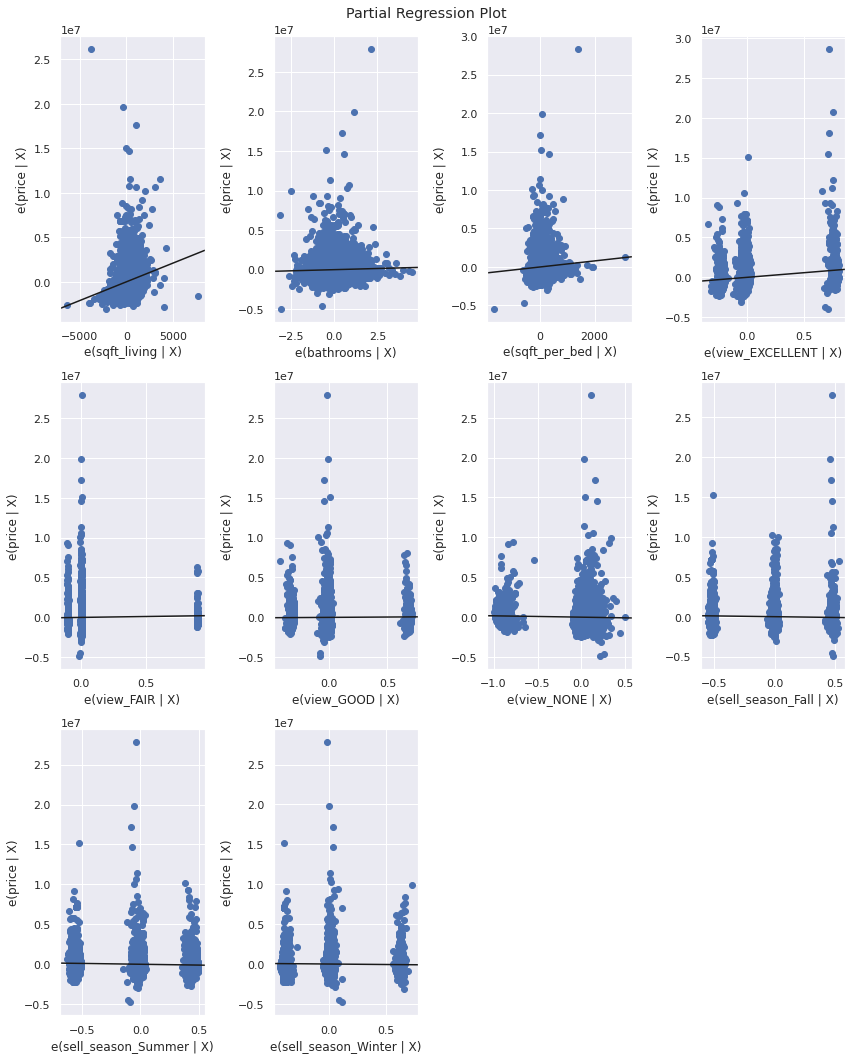

In [50]:
fig = plt.figure(figsize=(12,15))
sm.graphics.plot_partregress_grid(results, exog_idx=list(X.columns), grid=(3,4), fig=fig)
plt.tight_layout()
plt.show()

-- In addition to the adjusted R-Squared that we can see in the model summary, calculate either MAE or RMSE for this model.

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred = results.predict(sm.add_constant(X))
mean_absolute_error(y, y_pred)

383176.0200586229

In [52]:
mean_squared_error(y, y_pred, squared=False)

673326.634573501

## Regression Results

The main factors in making home price are Square footage of living space, The number of bathrooms, Quality of view from house. And the selling season also affect the price.   
The effect of each factor is as follows ;

This model is statistically significant overall, and explains about 43% of the variance in Sale Price.   
On average it is off by about $383k in its predictions of home price.

- All of this model's coefficients are statistically significant   
So I can say that:   
   
   
- const: When Square footage of living space is 0, the number of bathrooms is 0, Square footage per bedroom is 0 and quality of view is average and sold in Spring, we would expect a home sale price of $104K

- sqft_living: For each increase of Square footage of living space, we see an associated increase of about $419 in sale price

- bathrooms: For each increase of 1 in number of bathrooms, we see an associated increase of about $58k in sale price   
   
- sqft_per_bedrooms: For each increase of sqft per bedroom , we see an associated increase of about $394 in sale price

- view_EXCELLENT: Compared to a average view, we see an associated increase of about $1.2M for an EXCELLENT view

- view_FAIR: Compared to a average view, we see an associated increase of about $225k for a FAIR view

- view_GOOD: Compared to a average view, we see an associated increase of about $85k for a GOOD view

- view_NONE: Compared to a average view, we see an associated decrease of about $169k for a NONE view   
   
- sell_season_Fall: Compared to sell in Spring, we see an associated decrease of about $194k for sell in Fall   
   
- sell_season_Summer: Compared to sell in Spring, we see an associated decrease of about $209k for sell in Summer   
    
- sell_season_Winter: Compared to sell in Spring, we see an associated decrease of about $121k for sell in Winter   
   

## Handling Outliers

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30068 entries, 0 to 30154
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   selldate       30068 non-null  datetime64[ns]
 1   price          30068 non-null  float64       
 2   bedrooms       30068 non-null  int64         
 3   bathrooms      30068 non-null  float64       
 4   sqft_living    30068 non-null  int64         
 5   sqft_lot       30068 non-null  int64         
 6   floors         30068 non-null  float64       
 7   waterfront     30068 non-null  object        
 8   greenbelt      30068 non-null  object        
 9   nuisance       30068 non-null  object        
 10  view           30068 non-null  object        
 11  condition      30068 non-null  object        
 12  grade          30068 non-null  object        
 13  heat_source    30068 non-null  object        
 14  sewer_system   30068 non-null  object        
 15  sqft_above     3006

In [54]:
df.describe()[['price', 'bedrooms', 'bathrooms', 'sqft_living']]

,price,bedrooms,bathrooms,sqft_living
count,3.006800e+04,30068.000000,30068.0000,30068.000000
mean,1.108797e+06,3.419749,2.3383,2114.569975
std,8.937990e+05,0.972556,0.8858,972.517970
min,2.736000e+04,1.000000,0.5000,3.000000
25%,6.495000e+05,3.000000,2.0000,1420.000000
50%,8.600000e+05,3.000000,2.5000,1920.000000
75%,1.300000e+06,4.000000,3.0000,2620.000000
max,3.075000e+07,13.000000,10.5000,15360.000000


#### Check the outliers of 'price', 'bedrooms', 'bathrooms', 'sqft_living'

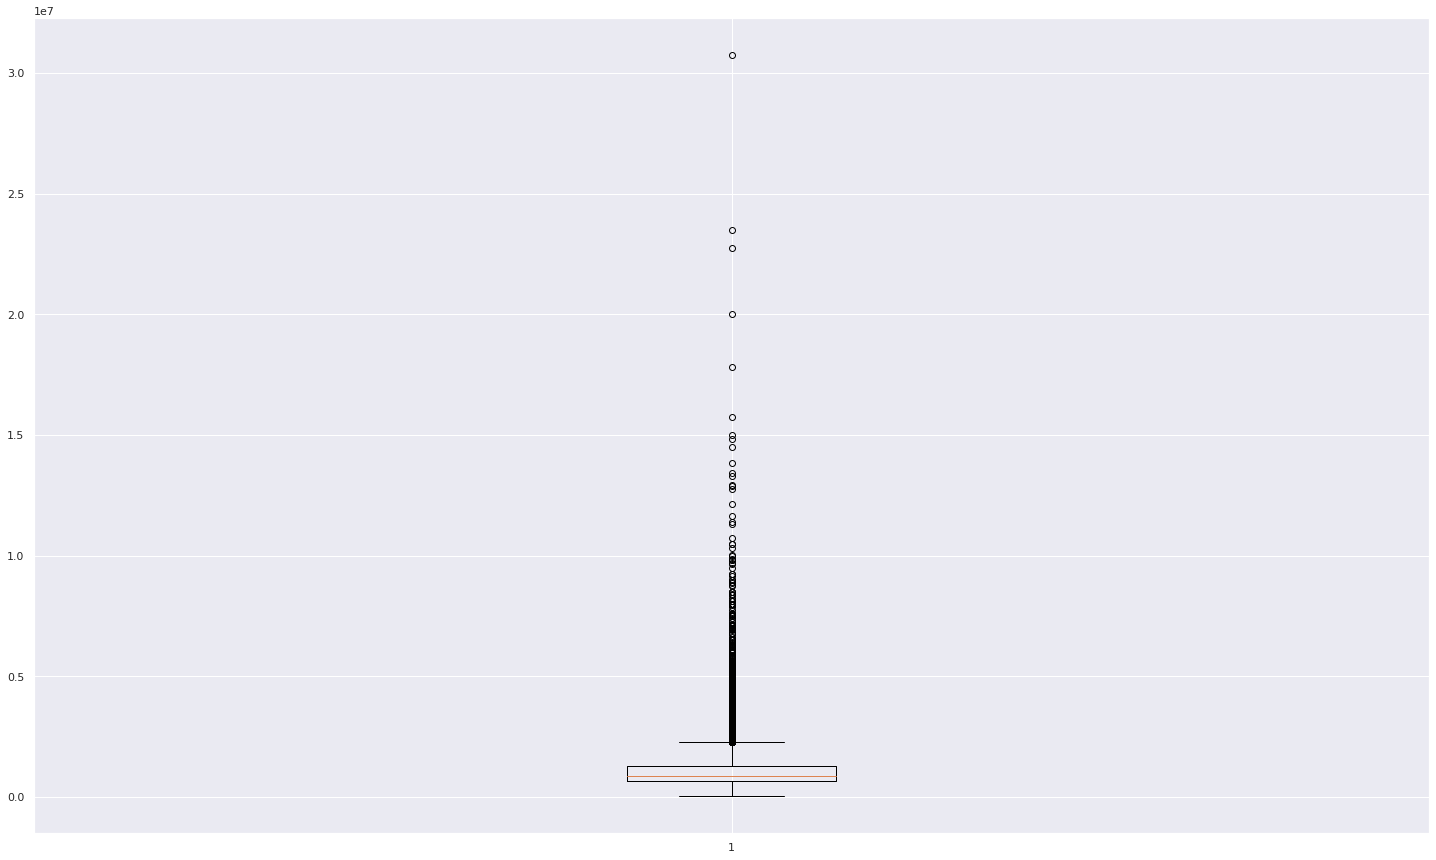

In [55]:
plt.boxplot(df.price);

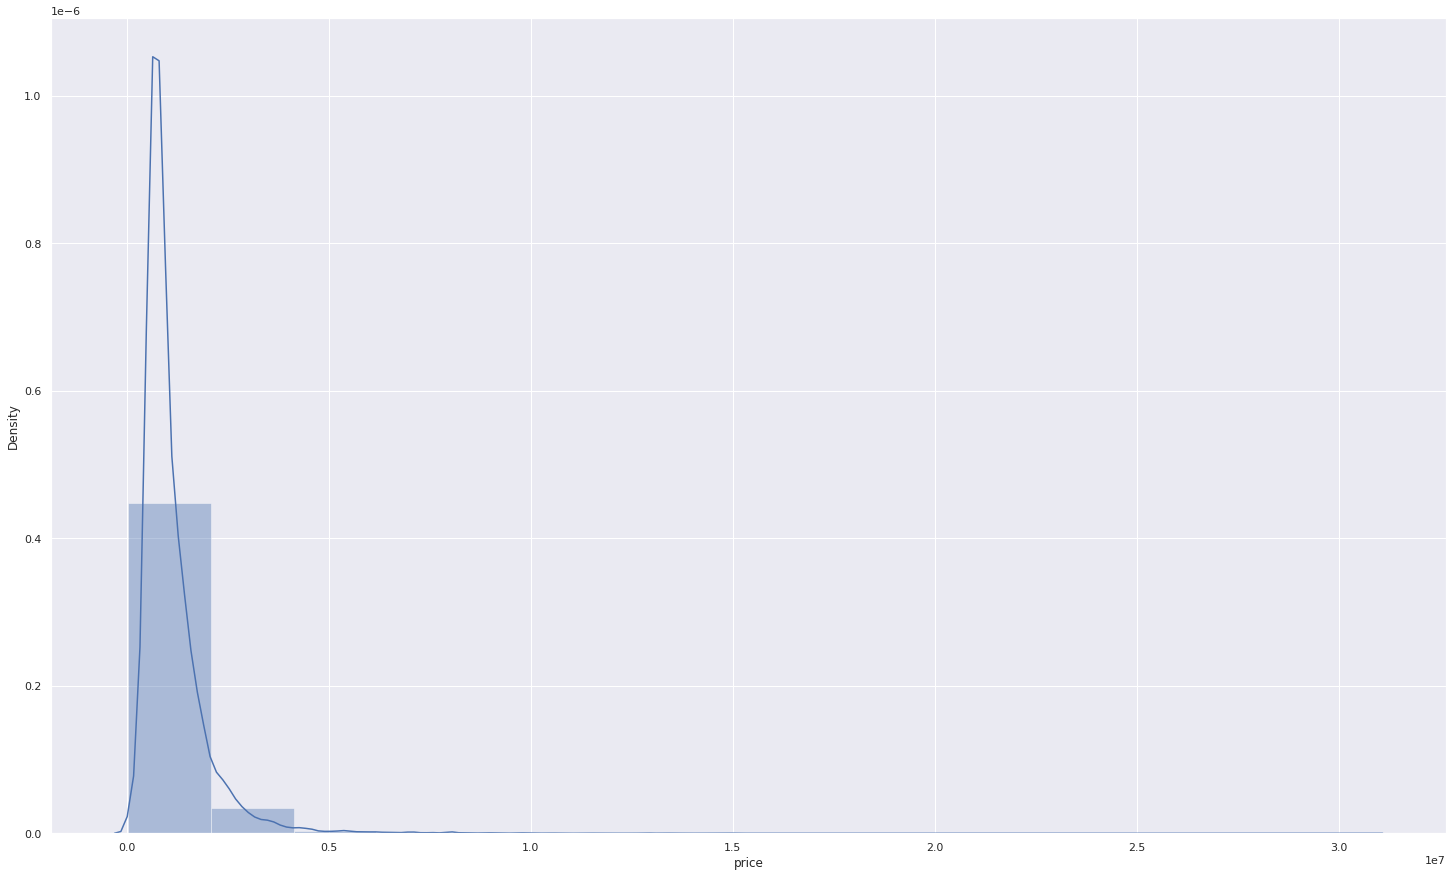

In [56]:
sns.distplot(df.price, bins=15, kde=True);

<AxesSubplot:>

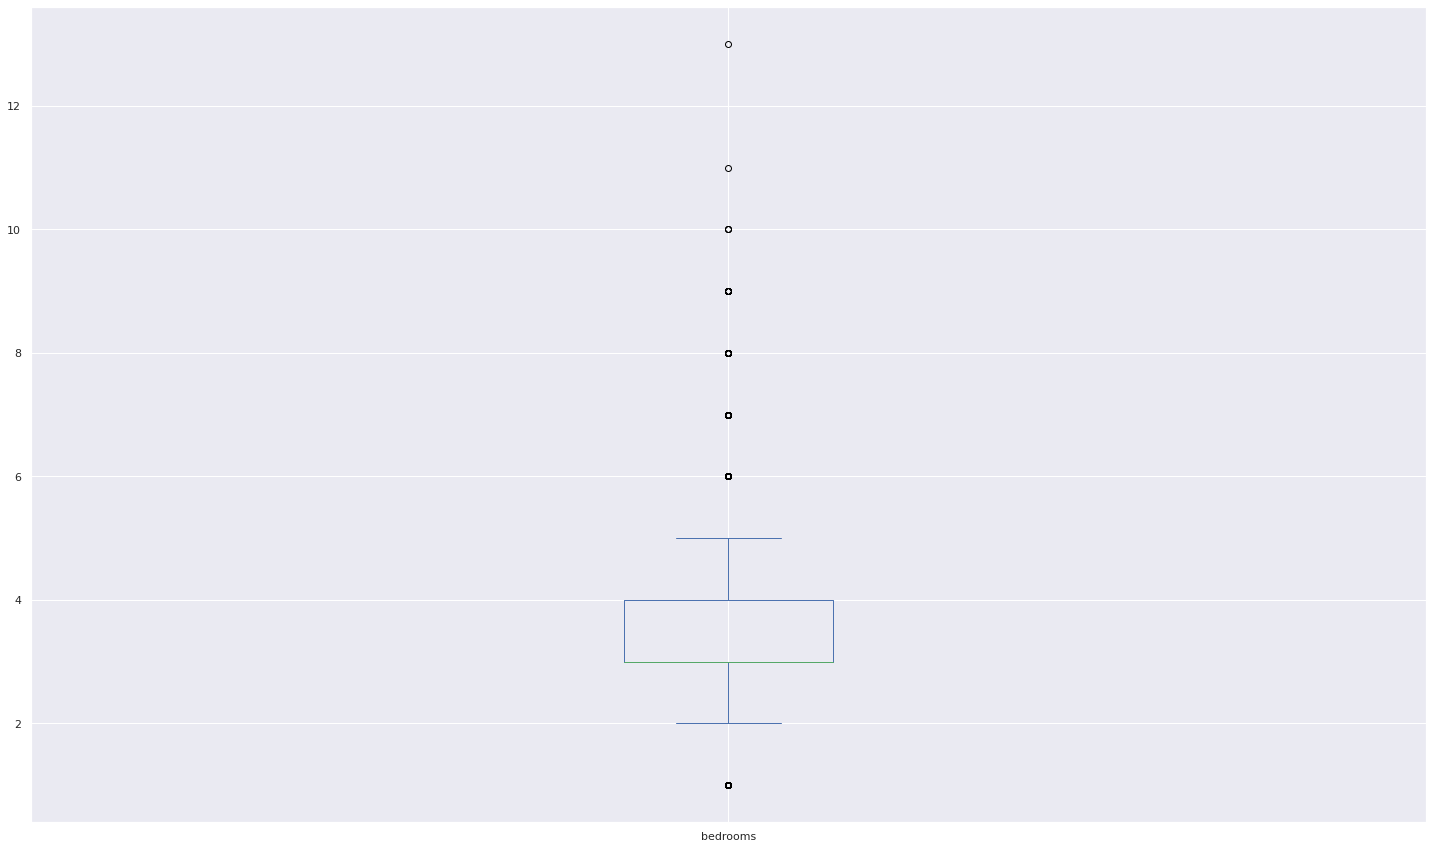

In [57]:
df.bedrooms.plot(kind='box')

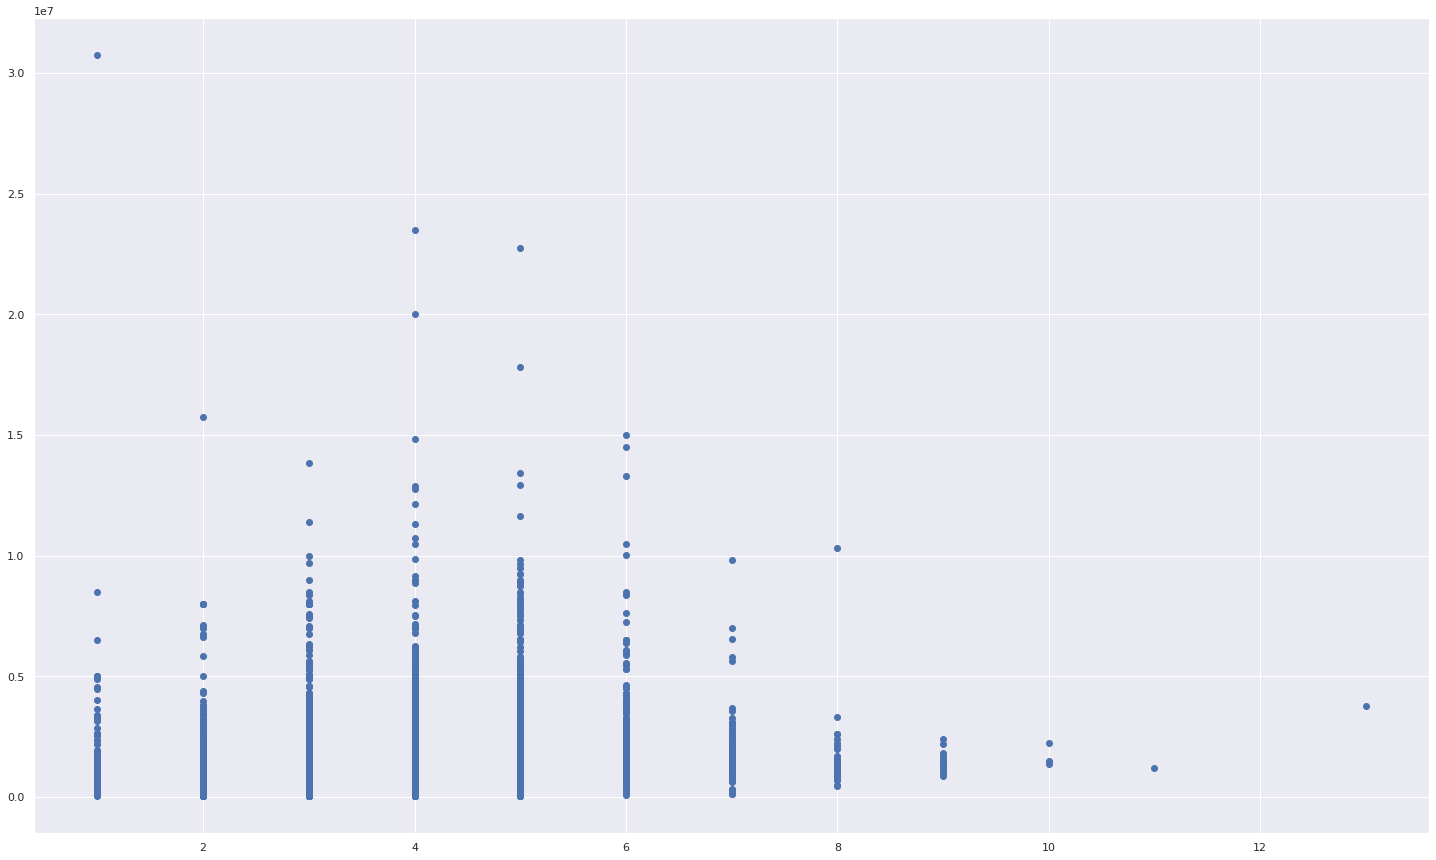

In [58]:
plt.scatter(df.bedrooms, df.price)

<AxesSubplot:>

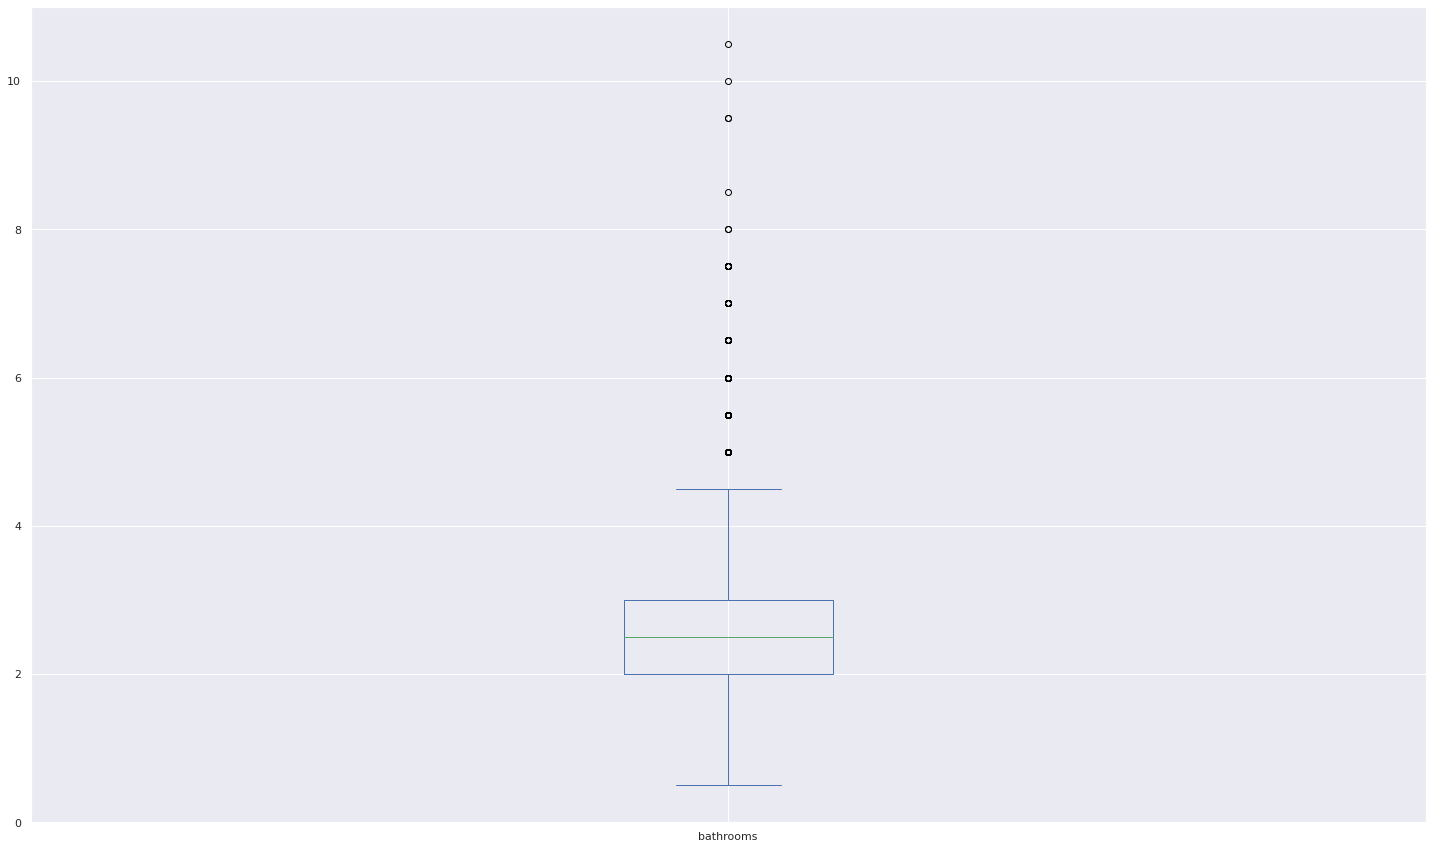

In [59]:
df.bathrooms.plot(kind='box')

<AxesSubplot:>

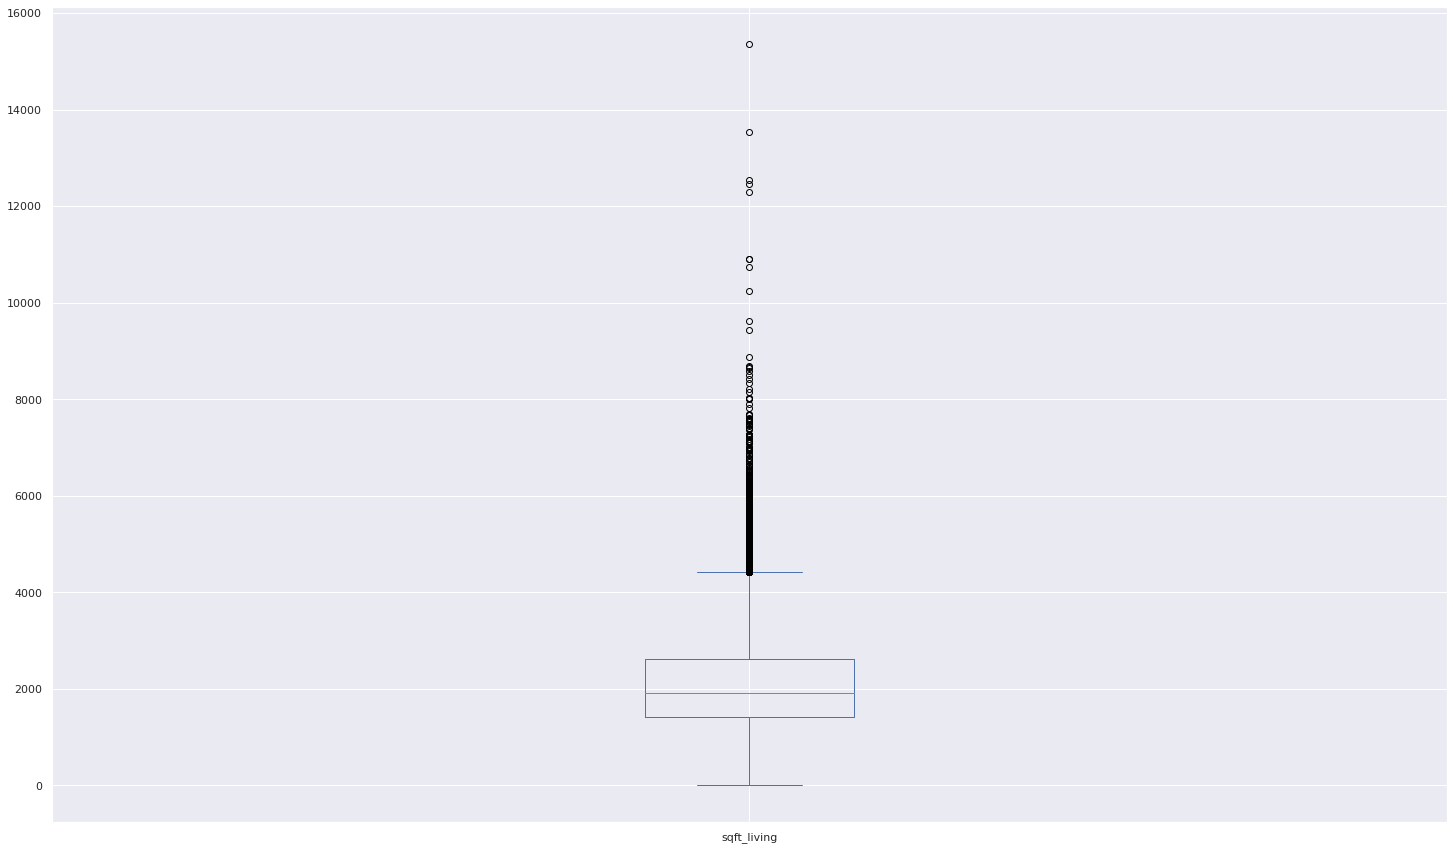

In [60]:
df.sqft_living.plot(kind='box')

In [61]:
# Make function for outlier

def outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    condition=( (data > ( q3 + 1.5*iqr )) | (data < ( q1 - 1.5*iqr )))
    outlier = df[condition].index
    return outlier

In [62]:
# Find out each variable's outluers

price_outlier = outliers(df['price'])
bedrooms_outlier = outliers(df['bedrooms'])
bathrooms_outlier = outliers(df['bathrooms'])
sqft_living_outlier = outliers(df['sqft_living'])

In [63]:
# Check the each variable's outliers

outlier = (price_outlier, bedrooms_outlier, bathrooms_outlier, sqft_living_outlier)
col = df[['price', 'bedrooms', 'bathrooms', 'sqft_living']]
for i, j in zip(col, outlier):
    print(i)
    print(len(j))
    print(j)

price
1987
Int64Index([   27,    36,    43,    84,   118,   130,   131,   139,   140,
              144,
            ...
            29865, 29872, 29947, 29982, 30083, 30100, 30106, 30126, 30130,
            30140],
           dtype='int64', length=1987)
bedrooms
1015
Int64Index([    2,    44,   110,   116,   135,   137,   139,   148,   244,
              247,
            ...
            29872, 29890, 29900, 29903, 29965, 29979, 30036, 30071, 30116,
            30136],
           dtype='int64', length=1015)
bathrooms
348
Int64Index([  129,   137,   139,   284,   291,   399,   617,   631,   635,
              657,
            ...
            29140, 29162, 29283, 29379, 29467, 29586, 29696, 29865, 29872,
            30126],
           dtype='int64', length=348)
sqft_living
722
Int64Index([   39,   131,   139,   140,   147,   159,   203,   209,   273,
              284,
            ...
            29691, 29696, 29794, 29822, 29827, 29865, 29868, 29876, 30073,
            30126],
         

In [64]:
# Add all outliers

outliers_index = np.concatenate((price_outlier, bedrooms_outlier, bathrooms_outlier, sqft_living_outlier), axis=None)
print(len(outliers_index))
outliers_index

4072


array([   27,    36,    43, ..., 29876, 30073, 30126])

In [65]:
# Drop the all outliers

df_clean = df.drop(outliers_index)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27033 entries, 0 to 30154
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   selldate       27033 non-null  datetime64[ns]
 1   price          27033 non-null  float64       
 2   bedrooms       27033 non-null  int64         
 3   bathrooms      27033 non-null  float64       
 4   sqft_living    27033 non-null  int64         
 5   sqft_lot       27033 non-null  int64         
 6   floors         27033 non-null  float64       
 7   waterfront     27033 non-null  object        
 8   greenbelt      27033 non-null  object        
 9   nuisance       27033 non-null  object        
 10  view           27033 non-null  object        
 11  condition      27033 non-null  object        
 12  grade          27033 non-null  object        
 13  heat_source    27033 non-null  object        
 14  sewer_system   27033 non-null  object        
 15  sqft_above     2703

<AxesSubplot:>

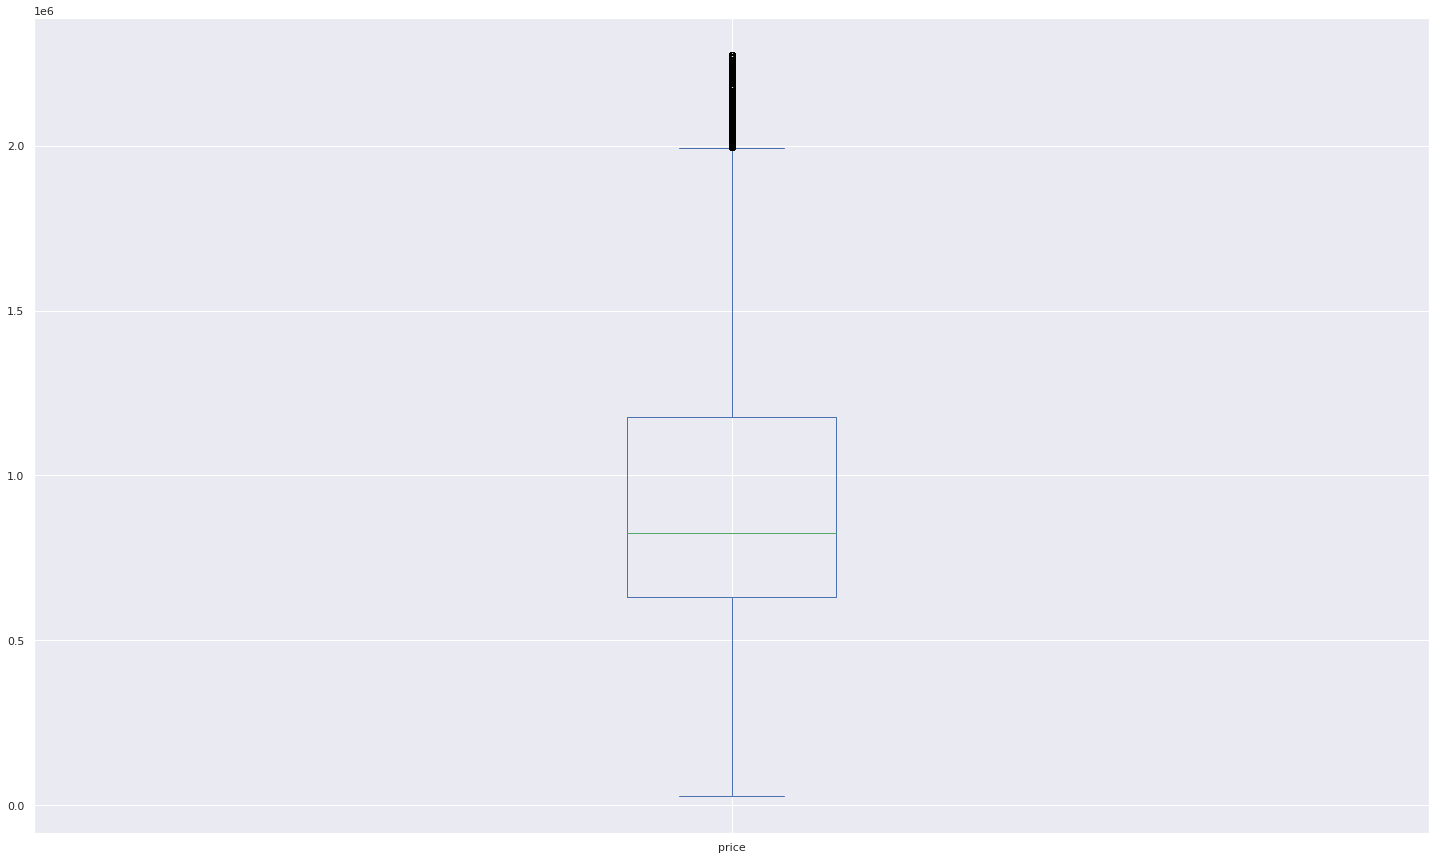

In [66]:
df_clean['price'].plot.box()

<AxesSubplot:>

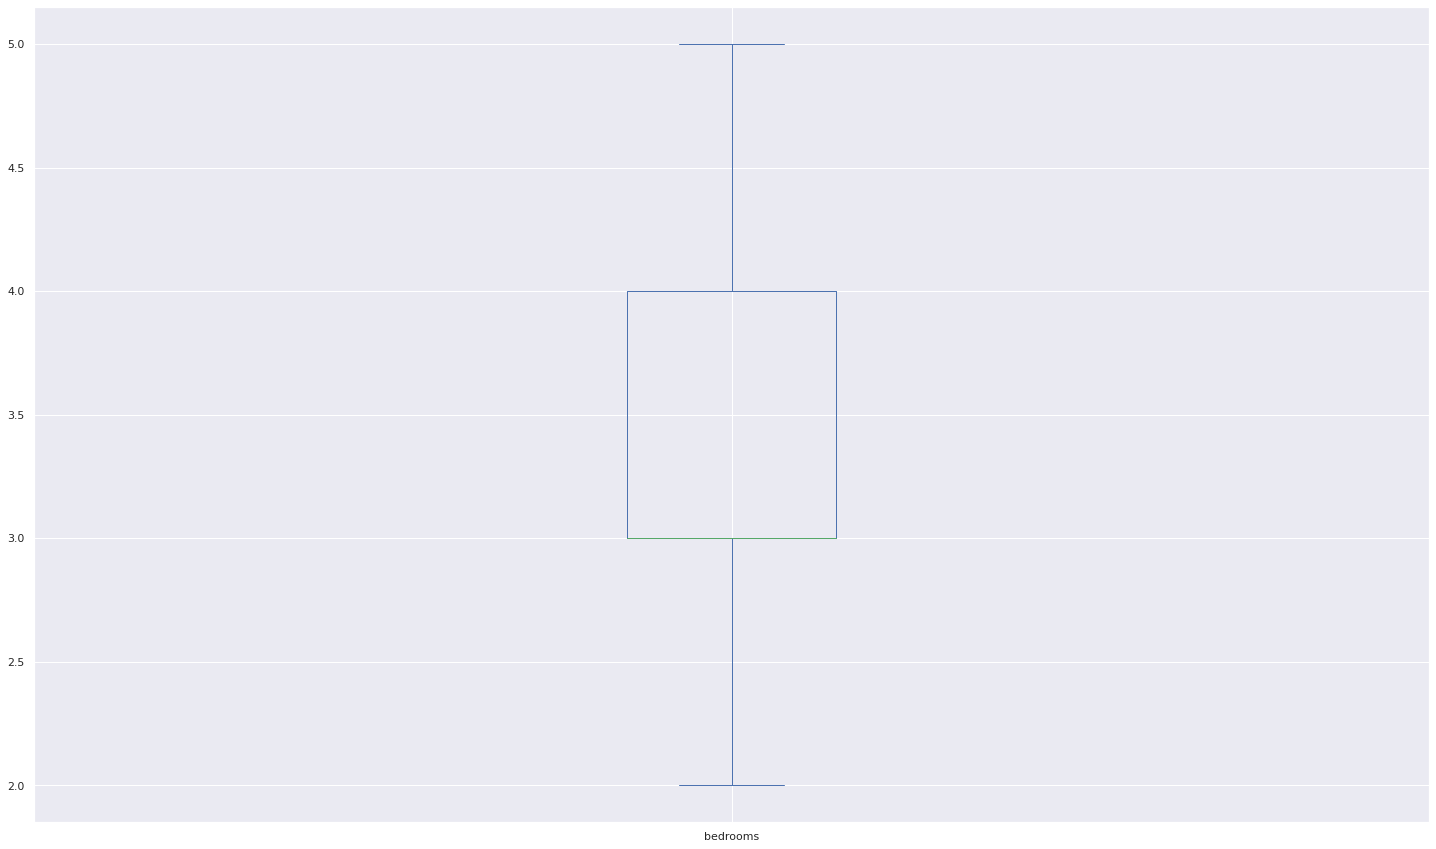

In [67]:
df_clean['bedrooms'].plot.box()

<AxesSubplot:>

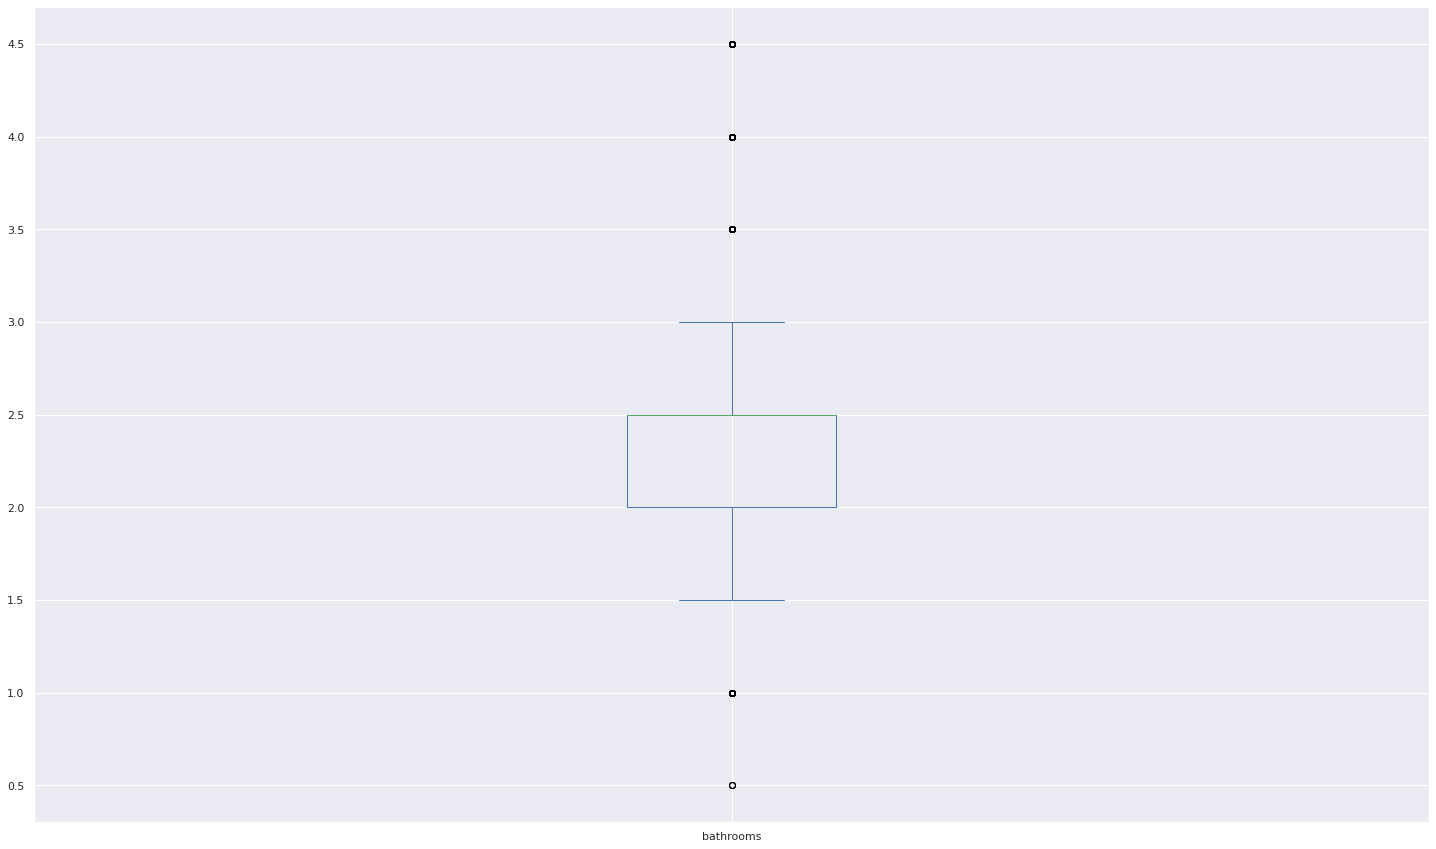

In [68]:
df_clean['bathrooms'].plot.box()

<AxesSubplot:>

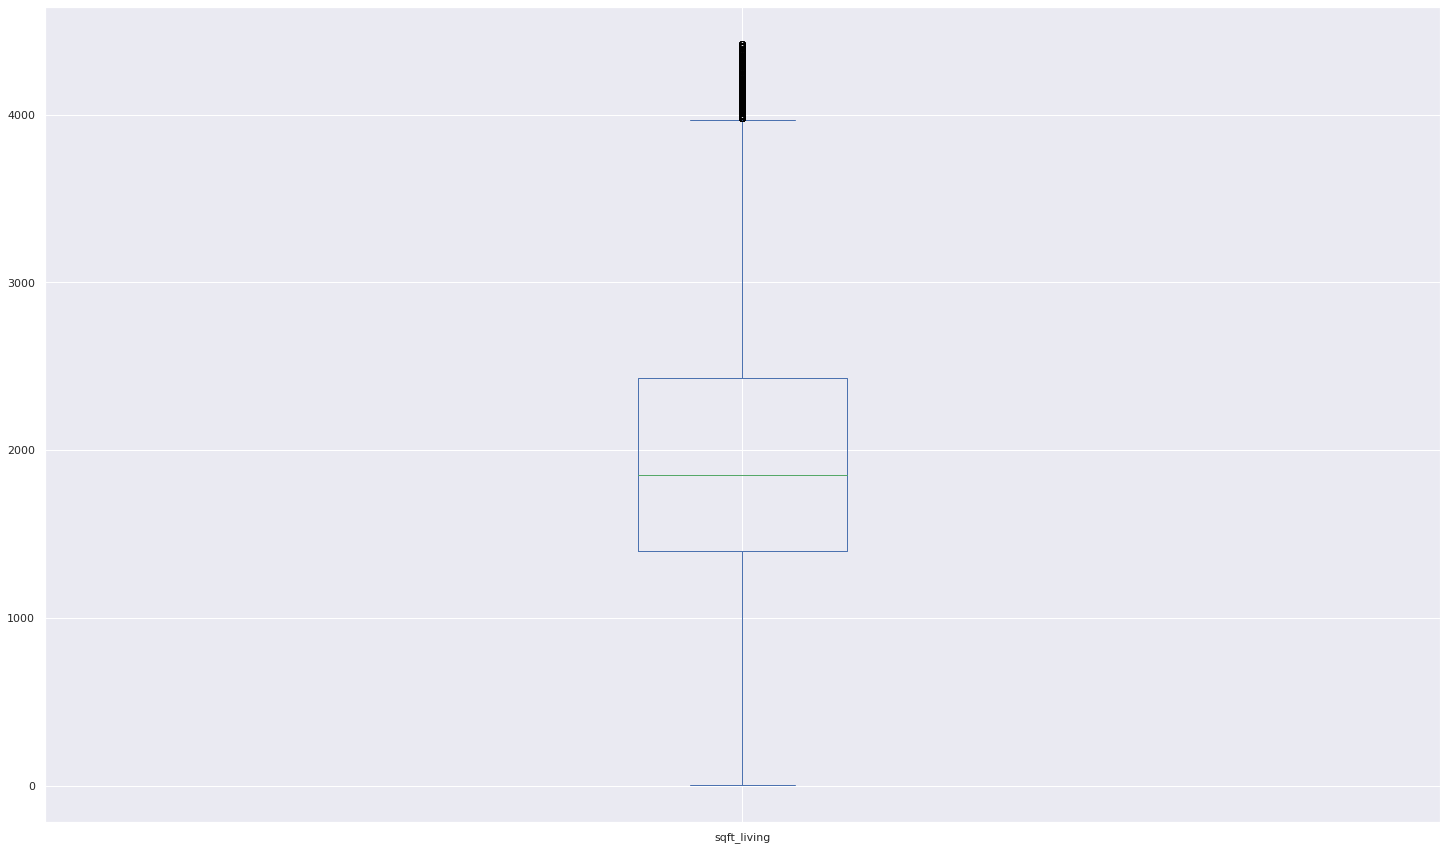

In [69]:
df_clean['sqft_living'].plot.box()

In [70]:
# Recalculate the sqft_per_bed

df_clean['sqft_per_bed'] = df_clean.sqft_living / df_clean.bedrooms
df_clean.head()

,selldate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,yr_built,yr_renovated,address,lat,long,yr_old,bath_per_bed,sqft_per_bed,sell_month,sell_season
0,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.190520,53,0.25,295.0,5,Spring
1,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.355910,71,0.50,554.0,12,Winter
3,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.290200,11,1.00,720.0,12,Winter
4,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.071880,9,1.00,560.0,8,Summer
5,2021-07-20,625000.0,2,1.0,1190,5688,1.0,NO,NO,YES,...,1948,0,"1602 North 185th Street, Shoreline, Washington...",47.763470,-122.340155,73,0.50,595.0,7,Summer


In [71]:
df_clean.corr()['price']

price            1.000000
bedrooms         0.302899
bathrooms        0.417541
sqft_living      0.553746
sqft_lot         0.072426
floors           0.185854
sqft_above       0.463529
sqft_basement    0.186600
sqft_garage      0.225424
sqft_patio       0.234229
yr_built         0.065643
yr_renovated     0.057545
lat              0.085038
long            -0.029580
yr_old          -0.089860
bath_per_bed     0.201769
sqft_per_bed     0.450584
sell_month      -0.071898
Name: price, dtype: float64

#### The Bathrooms, Sqft_living, Sqft_per_bed still have high correlaion with Price.

### Baseline Model without outlier

In [72]:
y = df_clean.price
X = df_clean[['sqft_living', 'bathrooms', 'sqft_per_bed']]

no_outlier_model = sm.OLS(y, sm.add_constant(X))
no_outlier_results = no_outlier_model.fit()
print(no_outlier_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     4102.
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        14:16:37   Log-Likelihood:            -3.8382e+05
No. Observations:               27033   AIC:                         7.676e+05
Df Residuals:                   27029   BIC:                         7.677e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.143e+05   8533.664     25.111   

#### Without outlier Baseline(WOB) Model Interpretation compare to with outlier baseline(WB) model 

- The WOB model is statistically significant overall, with an F-statistic p-value well below 0.05   
- The WOB Model explains about 31% of the variance in Sale Price whereas WB explains 38%.   
- The WOB model coefficients (const, sqft_living, bathrooms and sqft_per_bed) are all statistically significant, with t-statistic p-values well below 0.05
- For each increase of sqft_living, we see an associated increase in Sale Price of about ``` WOB $250, WB $441```   
- For each increase of bathrooms, we see an associated increase in Sale Price of about ``` WOB $39K, WB $47K```   
- For each increase of sqft_per_bed, we see an associated increase in Sale Price of about ``` WOB $240, WB $547```

### Final Model without outlier

In [73]:
y = df_clean.price
X = df_clean[['sqft_living', 'bathrooms', 'sqft_per_bed', 'view', 'sell_season']]
X = pd.get_dummies(X, columns=['view', 'sell_season'])
X = X.drop(['view_AVERAGE', 'sell_season_Spring'], axis=1)   # Take 'view_Average' and ''sell_Spring' as a reference variable 
X

,sqft_living,bathrooms,sqft_per_bed,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,sell_season_Fall,sell_season_Summer,sell_season_Winter
0,1180,1.0,295.000000,0,0,0,1,0,0,0
1,2770,2.5,554.000000,0,0,0,0,0,0,1
3,2160,3.0,720.000000,0,0,0,0,0,0,1
4,1120,2.0,560.000000,0,0,0,1,0,1,0
5,1190,1.0,595.000000,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
30150,1910,2.0,382.000000,0,0,0,1,1,0,0
30151,2020,2.0,673.333333,0,1,0,0,0,1,0
30152,1620,2.0,540.000000,0,0,0,1,0,0,0
30153,2570,2.5,856.666667,0,0,0,1,0,0,1


In [74]:
no_dummy_model = sm.OLS(y, sm.add_constant(X))
no_dummy_results = no_dummy_model.fit()
print(no_dummy_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     1403.
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        14:16:37   Log-Likelihood:            -3.8324e+05
No. Observations:               27033   AIC:                         7.665e+05
Df Residuals:                   27022   BIC:                         7.666e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4.352e+05   1.31

-- For each feature of the regression above (including the dummy features), plot the partial regression.

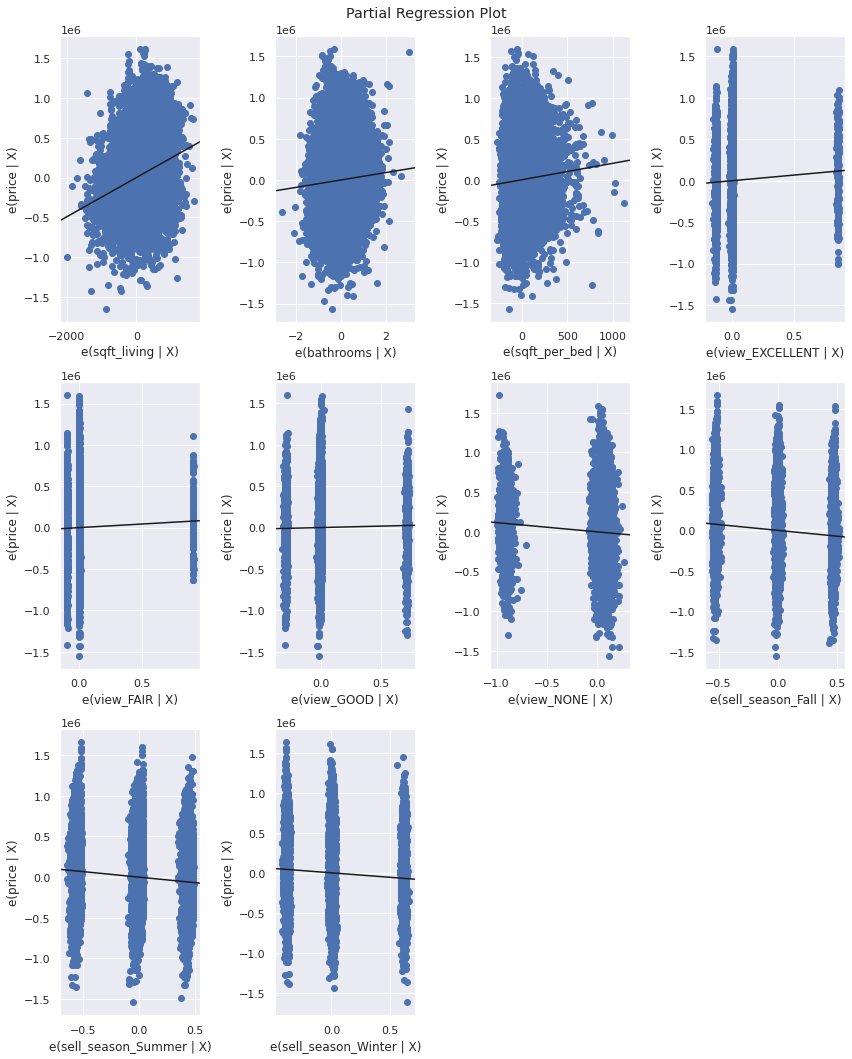

In [75]:
fig = plt.figure(figsize=(12,15))
sm.graphics.plot_partregress_grid(no_dummy_results, exog_idx=list(X.columns), grid=(3,4), fig=fig)
plt.tight_layout()
plt.show()

-- In addition to the adjusted R-Squared that we can see in the model summary, calculate either MAE or RMSE for this model.

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred = results.predict(sm.add_constant(X))
mean_absolute_error(y, y_pred)

309839.9873342675

In [77]:
mean_squared_error(y, y_pred, squared=False)

408704.30303241685

## Without Outlier Model Regression Results

Overall results numbers decreased because the extremely high value were removed. But the overall regression results are the same with With Outlier Model. But only view_excellent value shows especially a big decrease.

This model is statistically significant overall, and explains about 34% of the variance in Sale Price.
On average it is off by about $310k in its predictions of home price.

All of this model's coefficients are statistically significant
So I can say that:

sqft_living: For each increase of Square footage of living space, we see an associated increase of about $247 in sale price

bathrooms: For each increase of 1 in number of bathrooms, we see an associated increase of about $44k in sale price

sqft_per_bedrooms: For each increase of sqft per bedroom , we see an associated increase of about $200 in sale price

view_EXCELLENT: Compared to a average view, we see an associated increase of about $133K for an EXCELLENT view

view_FAIR: Compared to a average view, we see an associated increase of about $87k for a FAIR view

view_GOOD: Compared to a average view, we see an associated increase of about $35k for a GOOD view

view_NONE: Compared to a average view, we see an associated decrease of about $115k for a NONE view

sell_season_Fall: Compared to sell in Spring, we see an associated decrease of about $143k for sell in Fall

sell_season_Summer: Compared to sell in Spring, we see an associated decrease of about $135k for sell in Summer

sell_season_Winter: Compared to sell in Spring, we see an associated decrease of about $112k for sell in Winter

## Conclusion

We might use statistical analysis to find patterns in unstructured and semi-structured customer data that can be used to create a more positive customer experience and increase sales.     
A linear regression is a statistical technique that relates a dependent variable(sale price) to independent variables(sqft_living, bathrooms, sqft_per_bed, view, sell_season). And this regression model is able to show whether changes observed in the dependent variable are associated with changes in independent variables.   

According to this model, it shows that Square footage of living space, number of bathrooms, Square footage per bedroom and Quality of view from house have a significant influence among many variables that affect house price, and also shows that the season of sale also has an effect. Therefore, when constructing a house, it is necessary to consider these aspects and it seems that the season should also be considered when buying and selling.

However, there are four assumptions associated with this model(a linear regression model).   
1. The relationship between variables is linear   
2. Homoskedasticity, or that the variance of the variables and error term must remain constant   
3. All explanatory variables are independent of one another   
4. All variables are normally-distributed  
   
So, if the assumptions are breached, we need more advanced statistical analysis to explain the relation and effect between dependent variable and independent variables.